In [29]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [30]:
df=pd.read_csv("./datasets/placement.csv")

In [31]:
df.head()

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0


In [32]:
df.shape

(1000, 3)

In [33]:
df.duplicated().sum()

19

In [34]:
#df.drop_duplicates(inplace=True)

In [35]:
df.shape

(1000, 3)

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   cgpa                  1000 non-null   float64
 1   placement_exam_marks  1000 non-null   float64
 2   placed                1000 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 23.6 KB


# Distribution of dataset

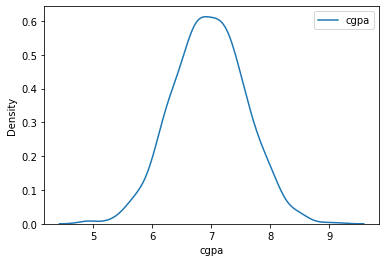

In [37]:
sns.kdeplot(df["cgpa"],label="cgpa")
plt.legend()
plt.show()

In [38]:
df["cgpa"].skew()

-0.014529938929314918

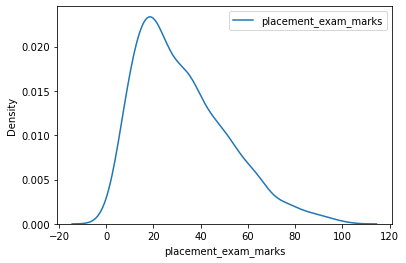

In [39]:
sns.kdeplot(df["placement_exam_marks"],label="placement_exam_marks")
plt.legend()
plt.show()

In [40]:
df["placement_exam_marks"].skew()

0.8356419499466834

/home/ajit/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


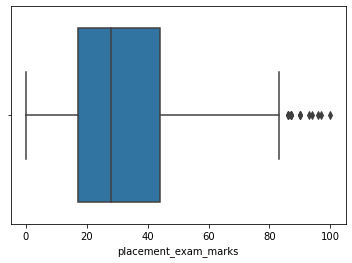

In [43]:
sns.boxplot(df["placement_exam_marks"])
plt.show()

##### In the above diagram, we can see that only "placement_exam_marks" column is  skew so we will be applying the IQR methode on this column to remove the outlier.

In [49]:
p_25=df["placement_exam_marks"].quantile(0.25)
p_75=df["placement_exam_marks"].quantile(0.75)
IQR=p_75-p_25
print(IQR)

27.0


In [50]:
upper_limit=p_75+1.5*IQR
lower_limit=p_25-1.5*IQR

# Trimming

In [52]:
df=df[(df["placement_exam_marks"]<upper_limit) & (df["placement_exam_marks"]>lower_limit)]

In [53]:
df.shape

(985, 3)

/home/ajit/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


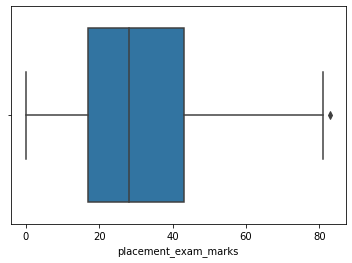

In [54]:
sns.boxplot(df["placement_exam_marks"])
plt.show()

# Capping

In [61]:
df=pd.read_csv("./datasets/placement.csv")

In [62]:
df["placement_exam_marks"] =np.where(
    df["placement_exam_marks"] > upper_limit,
    upper_limit,
    np.where(
    df["placement_exam_marks"] < lower_limit,
        lower_limit,
        df["placement_exam_marks"]
    )
)

In [63]:
df.shape

(1000, 3)

/home/ajit/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


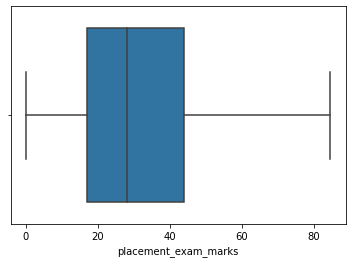

In [66]:
sns.boxplot(df["placement_exam_marks"])
plt.show()